## Wrangle and Analyze Data project

### we have 3 tables:

1-Twitter archive file

2-The tweet image predictions

3- tweet data  

In [191]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests as re
import seaborn as sns
import json
import time
import math 
import tweepy
import matplotlib.patches as mpatches
from scipy import stats
from tweepy import OAuthHandler
from timeit import default_timer as timer
import seaborn as sb

## 1-Twitter archive file

In [130]:
#Read CSV file 
df = pd.read_csv('twitter-archive-enhanced.csv')

## 2- Tweet image prediction

In [131]:
#URL downloaded programatically 

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = re.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

## 3- tweet data

In [132]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '5Uur0mo4ol2kB8yhtZ1VxXS0u'
consumer_secret = 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH'
access_token = '303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB'
access_secret = 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [133]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [74]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257


KeyboardInterrupt: 

In [134]:
# Create a empty list for insert each tweet info into it
tweets = []

tweet_json = open('tweet_json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

In [135]:
tweet_data = pd.DataFrame()  
# create a empty dataframe for map the tweet_data info 

tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

## Assess data

### Assess 1-Twitter archive file

In [136]:
df.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [138]:
sum(df['tweet_id'].duplicated())

0

### Assess 2-Tweet image prediction

In [139]:
image_prediction.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

In [140]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [141]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [142]:
tweet_data.head()

id  retweet_count  favorite_count
0  892420643555336193           8000           37325
1  892177421306343426           5938           32088
2  891815181378084864           3926           24185
3  891689557279858688           8162           40629
4  891327558926688256           8837           38865

In [143]:
sum(tweet_data['id'].duplicated())

0

### Assess 3- Tweet data

In [144]:
tweet_data.head()

id  retweet_count  favorite_count
0  892420643555336193           8000           37325
1  892177421306343426           5938           32088
2  891815181378084864           3926           24185
3  891689557279858688           8162           40629
4  891327558926688256           8837           38865

In [145]:
sum(tweet_data['id'].duplicated())

0

# Quality

# twitter_archive table
1-Change the datatype of 'timestamp' to datetime

2-Optimize the source contents for human reading habit; change the long URL links to certain words.

3- name is sometimes not an actual name

4-Optimize the source content by ‘Twitter for iphone’, ‘Vine ’, ‘Twitter Web Client’, and ‘TweetDeck’

5- The standard for "rating_denominator" is 10, but it includes some other numbers.

# image_prediction table
6-Change the column names for better readability in image_predictions.

7- Delete duplicated jpg_url

8-Capitalize the first letter of first prediction (I could do that for all the predictions, but I decide to only apply to the first prediction since this variable is the important one).

9- some entries are retweets

10- Fixing wrong rating_numerator

# Tidiness

1-Create a new variable "dog_stage" to show the four dog stages, drop the four columns, and fill the empty with NaN

2- Drop 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'

### Define:
make copies for cleaning

### Code:

In [146]:

twitter_archive_clean = df.copy()
image_predictions_clean = image_prediction.copy()
tweet_data_clean = tweet_data.copy()

### Test:

In [147]:
twitter_archive_clean.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

# Clean Data

# Quality

### Issue-1
### Define:
Change the datatype of 'timestamp' to datetime

### code:

In [148]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

### Test:

In [149]:
twitter_archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
Name: timestamp, dtype: datetime64[ns]

### Issue-2
### Define:
Optimize the source contents for human reading habit; change the long URL links to certain words.

In [150]:
#CODE:
    
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

In [151]:
# Test:
twitter_archive_clean['source'].value_counts()

Twitter for iphone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue-3
### Define:
name is sometimes not an actual name

In [152]:
#CODE: Delete columns no needed
# choose the most frequent incorrect dog name and set them as None
not_name_list = ['a','the','an','O','this']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)
    


In [153]:
#test
twitter_archive_clean['name'].value_counts().head(10)

None       817
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
Name: name, dtype: int64

In [154]:
#test
twitter_archive_clean.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

            timestamp              source  \
0 2017-08-01 16:23:56  Twitter for iphone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

### Issue-4
### Define:
Optimize the source content by ‘Twitter for iphone’, ‘Vine ’, ‘Twitter Web Client’, and ‘TweetDeck’.

### Code:

In [155]:

# simpfy the source contexts
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

# change the type of source to category for preparing later visualization
#twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

### Test:

In [156]:
twitter_archive_clean['source'].value_counts()

# Four types of source: Twitter for iphone / Vine / Twitter Web Client / TweetDeck


Twitter for iphone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Issue-5
### Define:
10 is the default value of ‘rating_denominator’, then correct the wrong values based on the corresponding text information.

### code:

In [157]:
# filter the wrong rating_denominator values

df1 = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id                                               text  \
313   835246439529840640  @jonnysun @Lin_Manuel ok jomny I know you're e...   
342   832088576586297345           @docmisterio account started on 11/15/15   
433   820690176645140481  The floofs have been released I repeat the flo...   
516   810984652412424192  Meet Sam. She smiles 24/7 &amp; secretly aspir...   
784   775096608509886464  RT @dog_rates: After so many requests, this is...   
902   758467244762497024  Why does this never happen at my front door......   
1068  740373189193256964  After so many requests, this is Bretagne. She ...   
1120  731156023742988288  Say hello to this unbelievably well behaved sq...   
1165  722974582966214656  Happy 4/20 from the squad! 13/10 for all https...   
1202  716439118184652801  This is Bluebert. He just saw that both #Final...   
1228  713900603437621249  Happy Saturday here's 9 puppers on a bench. 99...   
1254  710658690886586372  Here's a brigade of puppers. All look very pre...   
1274  709198395643068416  From left to right:\nCletus, Jerome, Alejandro...   
1351  704054845121142784  Here is a whole flock of puppers.  60/50 I'll ...   
1433  697463031882764288  Happy Wednesday here's a bucket of pups. 44/40...   
1598  686035780142297088  Yes I do realize a rating of 4/20 would've bee...   
1634  684225744407494656  Two sneaky puppers were not initially seen, mo...   
1635  684222868335505415  Someone help the girl is being mugged. Several...   
1662  682962037429899265  This is Darrel. He just robbed a 7/11 and is i...   
1663  682808988178739200  I'm aware that I could've said 20/16, but here...   
1779  677716515794329600  IT'S PUPPERGEDDON. Total of 144/120 ...I think...   
1843  675853064436391936  Here we have an entire platoon of puppers. Tot...   
2335  666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian...   

      rating_numerator  rating_denominator  
313                960                   0  
342                 11                  15  
433                 84                  70  
516                 24                   7  
784                  9                  11  
902                165                 150  
1068                 9                  11  
1120               204                 170  
1165                 4                  20  
1202                50                  50  
1228                99                  90  
1254                80                  80  
1274                45                  50  
1351                60                  50  
1433                44                  40  
1598                 4                  20  
1634               143                 130  
1635               121                 110  
1662                 7                  11  
1663                20                  16  
1779               144                 120  
1843                88                  80  
2335                 1                   2

In [158]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

### Test:

In [159]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1068  740373189193256964                    NaN                  NaN   

               timestamp              source  \
1068 2016-06-08 02:41:38  Twitter for iphone   

                                                   text  retweeted_status_id  \
1068  After so many requests, this is Bretagne. She ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1068                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1068  https://twitter.com/dog_rates/status/740373189...                 9   

      rating_denominator  name doggo floofer pupper puppo  
1068                  10  None  None    None   None  None

### Issue-6
### Define:
Change the column names for better readability in image_predictions.

### Code:

In [160]:
# change the column names
image_prediction.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

### Test:

In [161]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num        first_prediction  first_confidence  first_dog  \
0        1  Welsh_springer_spaniel          0.465074       True   
1        1                 redbone          0.506826       True   
2        1         German_shepherd          0.596461       True   
3        1     Rhodesian_ridgeback          0.408143       True   
4        1      miniature_pinscher          0.560311       True   

    second_prediction  second_confidence  second_dog     third_prediction  \
0              collie           0.156665        True    Shetland_sheepdog   
1  miniature_pinscher           0.074192        True  Rhodesian_ridgeback   
2            malinois           0.138584        True           bloodhound   
3             redbone           0.360687        True   miniature_pinscher   
4          Rottweiler           0.243682        True             Doberman   

   third_confidence  third_dog  
0          0.061428       True  
1          0.072010       True  
2          0.116197       True  
3          0.222752       True  
4          0.154629       True

### Issue-7
### Define:
Delete duplicated jpg_url

### Code:

In [162]:
sum(image_prediction['jpg_url'].duplicated())

66

In [163]:
#CODE: Delete duplicated jpg_url
image_prediction= image_prediction.drop_duplicates(subset=['jpg_url'], keep='last')


### Test:

In [164]:
sum(image_prediction['jpg_url'].duplicated())

0

### Issue-8
### Define:
Capitalize the first letter of first prediction (I could do that for all the predictions, but I decide to only apply to the first prediction since this variable is the important one).

### Code:

In [165]:
image_prediction['first_prediction'] = image_prediction.first_prediction.str.capitalize()

### Test:

In [166]:
## test
image_prediction.head()
## 2th test 
image_prediction['first_prediction'].value_counts().head(10)

Golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
Pug                    55
Chow                   41
Samoyed                40
Toy_poodle             38
Pomeranian             38
Malamute               29
Name: first_prediction, dtype: int64

In [167]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2009 non-null int64
jpg_url              2009 non-null object
img_num              2009 non-null int64
first_prediction     2009 non-null object
first_confidence     2009 non-null float64
first_dog            2009 non-null bool
second_prediction    2009 non-null object
second_confidence    2009 non-null float64
second_dog           2009 non-null bool
third_prediction     2009 non-null object
third_confidence     2009 non-null float64
third_dog            2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [168]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num        first_prediction  first_confidence  first_dog  \
0        1  Welsh_springer_spaniel          0.465074       True   
1        1                 Redbone          0.506826       True   
2        1         German_shepherd          0.596461       True   
3        1     Rhodesian_ridgeback          0.408143       True   
4        1      Miniature_pinscher          0.560311       True   

    second_prediction  second_confidence  second_dog     third_prediction  \
0              collie           0.156665        True    Shetland_sheepdog   
1  miniature_pinscher           0.074192        True  Rhodesian_ridgeback   
2            malinois           0.138584        True           bloodhound   
3             redbone           0.360687        True   miniature_pinscher   
4          Rottweiler           0.243682        True             Doberman   

   third_confidence  third_dog  
0          0.061428       True  
1          0.072010       True  
2          0.116197       True  
3          0.222752       True  
4          0.154629       True

### Issue-9
### Define:
some entries are retweets

In [169]:
#CODE: convert timestamp to datetime
retweets = twitter_archive_clean.text.str.match('^RT @')
retweets.sum()

181

In [170]:
# Only keep the tweets that aren't retweets
twitter_archive_clean = twitter_archive_clean[~retweets]



In [171]:
#TEST
retweets = twitter_archive_clean.text.str.match('^RT @')
retweets.sum()

0

In [172]:
twitter_archive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp              source  \
0 2017-08-01 16:23:56  Twitter for iphone   
1 2017-08-01 00:17:27  Twitter for iphone   
2 2017-07-31 00:18:03  Twitter for iphone   
3 2017-07-30 15:58:51  Twitter for iphone   
4 2017-07-29 16:00:24  Twitter for iphone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Issue-10
### Define:
Fixing wrong rating_numerator

### Code:

In [173]:
# check the issues
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 
                                                                                         'rating_numerator', 
                                                                                         'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


tweet_id  \
45    883482846933004288   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45                   5                  10  
695                 75                  10  
763                 27                  10  
1689                 5                  10  
1712                26                  10

In [174]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

In [175]:
# update numerators values with the correct one

twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

### Test:

In [176]:
# check the issues
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 
                                                                                         'rating_numerator', 
                                                                                         'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


tweet_id  \
45    883482846933004288   
695   786709082849828864   
763   778027034220126208   
1689  681340665377193984   
1712  680494726643068929   

                                                                                                                                                                   text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  rating_denominator  
45               13.50                  10  
695               9.75                  10  
763              11.27                  10  
1689              9.50                  10  
1712             11.26                  10

# Tidiness


## Issue-1 
### Define:
Create a new variable "dogs_stage " to show the four dog stages, drop the four columns, and fill the empty with NaN

### Test:

### code:

In [177]:
# create new column `dog_stages` for the four columns('doggo', 'floofer','pupper','puppo')
twitter_archive_clean['dog_stages'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [178]:
# convert the datatype from object(string) to categorical
twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].astype('category')

In [179]:
# replace types 'None' with a null value
twitter_archive_clean['dog_stages'].replace('None', np.nan, inplace = True)

### Test:

In [180]:
twitter_archive_clean.groupby(['dog_stages']).size().reset_index().rename(columns={0: "count"})

dog_stages  count
0       None      0
1      doggo     75
2    floofer     10
3     pupper    234
4      puppo     25

In [181]:
# check the fixed
twitter_archive_clean['dog_stages'].isnull().sum()

1831

In [182]:
twitter_archive_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1967  673342308415348736                    NaN                  NaN   
789   773985732834758656                    NaN                  NaN   
2132  670079681849372674                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
102   872620804844003328                    NaN                  NaN   

               timestamp              source  \
1967 2015-12-06 03:24:51  Twitter for iphone   
789  2016-09-08 20:45:53  Twitter for iphone   
2132 2015-11-27 03:20:20  Twitter for iphone   
2329 2015-11-16 21:54:18  Twitter for iphone   
102  2017-06-08 01:06:27  Twitter for iphone   

                                                   text  retweeted_status_id  \
1967  This is Django. He's a skilled assassin pupper...                  NaN   
789   Meet Winnie. She just made awkward eye contact...                  NaN   
2132  Meet Fabio. He's a wonderful pup. Can't stay a...                  NaN   
2329  Those are sunglasses and a jean jacket. 11/10 ...                  NaN   
102   This is Monkey. She's supporting owners everyw...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1967                       NaN                        NaN   
789                        NaN                        NaN   
2132                       NaN                        NaN   
2329                       NaN                        NaN   
102                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1967  https://twitter.com/dog_rates/status/673342308...              10.0   
789   https://twitter.com/dog_rates/status/773985732...              11.0   
2132  https://twitter.com/dog_rates/status/670079681...              10.0   
2329  https://twitter.com/dog_rates/status/666373753...              11.0   
102   https://twitter.com/dog_rates/status/872620804...              13.0   

      rating_denominator    name doggo floofer  pupper puppo dog_stages  
1967                  10  Django  None    None  pupper  None     pupper  
789                   10  Winnie  None    None  pupper  None     pupper  
2132                  10   Fabio  None    None    None  None        NaN  
2329                  10    None  None    None    None  None        NaN  
102                   10  Monkey  None    None    None  None        NaN

## Issue-2
### Define:

Drop 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp',,'in_reply_to_status_id','in_reply_to_user_id'

### Code:

In [183]:
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1,inplace= True)

### Test:

In [184]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dog_stages            344 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 223.2+ KB


# Storing, Analyzing, and Visualizing Data

In [185]:
# Store data on tweet_json.txt
twitter_archive_clean.to_csv('twitter_archive_master.csv')

In [186]:
#Read CSV file 
Final_data = pd.read_csv('twitter_archive_master.csv')

In [187]:
Final_data.head(1)

Unnamed: 0            tweet_id            timestamp              source  \
0           0  892420643555336193  2017-08-01 16:23:56  Twitter for iphone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   

   rating_denominator     name doggo floofer pupper puppo dog_stages  
0                  10  Phineas  None    None   None  None        NaN

# 1-Dstribution of Source

Twitter for iphone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64


Text(0.5,1,'The Distribution of Source')

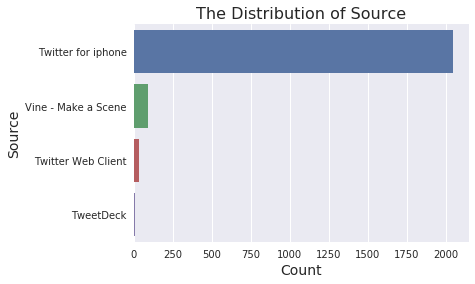

In [188]:
sorted_source = Final_data['source'].value_counts().index
print(Final_data['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)


describe
the plot above shows distrbution of sources, it appear from it that source of twitter for iphone is the frist with more then 20000 tweet .

# 2-Dog Rating distribution

(0, 20)

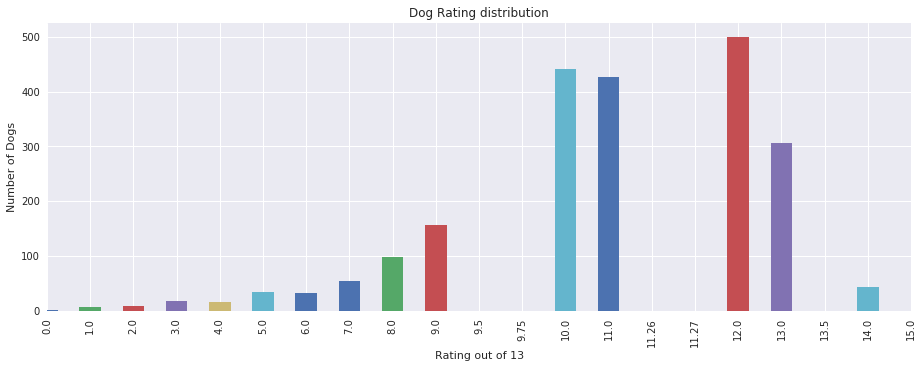

In [195]:
fig = plt.figure()
ax = fig.add_axes([.50, .50, 2, 1])
base_color = sb.color_palette()[0]



ax = Final_data.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 13")
ax.set_ylabel("Number of Dogs")
plt.savefig('rating_dist')
plt.xlim(0,20)


the graph above shows number of rating , we can see that the dogs has 12 rate is the frist with more 500 dogs.

# 3- The Distribution of Dog Stages

In [196]:
sorted_stage = Final_data['dog_stages'].value_counts().head(3).index

print(sorted_stage)

Index(['pupper', 'doggo', 'puppo'], dtype='object')


Text(0.5,1,'The Distribution of Dog Stages')

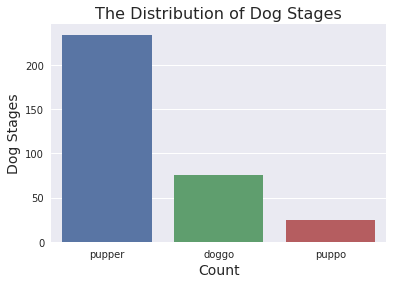

In [197]:
sorted_stage = Final_data['dog_stages'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, x = 'dog_stages', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

the plot above shows Distribution of Dog Stages it is clear that pupper gagtory isis the most popular dog stage,